In [2]:
import numpy as np
import pandas as pd
myData = pd.read_csv('../data/indian_liver_patient.csv')
print(myData.shape)

(583, 11)


In [3]:
peek = myData.head(10)
print(peek)

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   
5   46    Male              1.8               0.7                   208   
6   26  Female              0.9               0.2                   154   
7   29  Female              0.9               0.3                   202   
8   17    Male              0.9               0.3                   202   
9   55    Male              0.7               0.2                   290   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                       

In [4]:
shape = myData.shape
print(shape)

(583, 11)


In [5]:
types = myData.dtypes
print(types)

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object


In [7]:
outcome_counts = myData.groupby('Dataset').size()
print(outcome_counts)

Dataset
1    416
2    167
dtype: int64


In [8]:
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
correlations = myData.corr(method = 'pearson')
print(correlations)

                              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
Age                         1.000            0.012         7.529e-03                 0.080   
Total_Bilirubin             0.012            1.000         8.746e-01                 0.207   
Direct_Bilirubin            0.008            0.875         1.000e+00                 0.235   
Alkaline_Phosphotase        0.080            0.207         2.349e-01                 1.000   
Alamine_Aminotransferase   -0.087            0.214         2.339e-01                 0.126   
Aspartate_Aminotransferase -0.020            0.238         2.575e-01                 0.167   
Total_Protiens             -0.187           -0.008        -1.387e-04                -0.029   
Albumin                    -0.266           -0.222        -2.285e-01                -0.165   
Albumin_and_Globulin_Ratio -0.216           -0.206        -2.001e-01                -0.234   
Dataset                    -0.137           -0.220        -2

<AxesSubplot:ylabel='Frequency'>

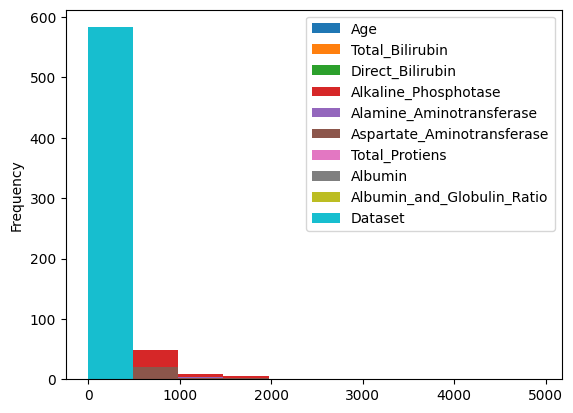

In [9]:
import matplotlib.pyplot as plt
myData.plot.hist()

In [10]:
myData.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize = (10,10))
plt.show()

ValueError: Layout of 3x3 must be larger than required size 10

<Figure size 1000x1000 with 0 Axes>

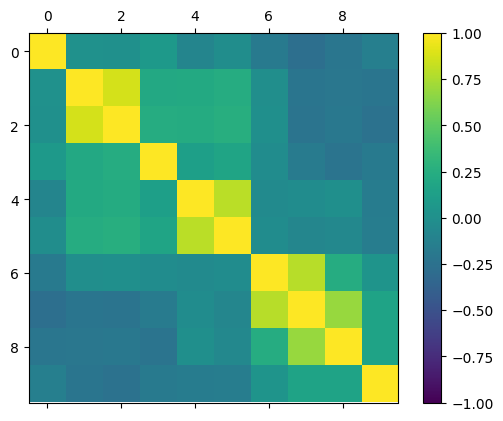

In [11]:
correlations = myData.corr()
# plot correlation matrix
myfig = plt.figure()
axis = myfig.add_subplot(111) # There is only one subplot or graph;
# "111" means "1x1 grid, first subplot"
cax = axis.matshow(correlations, vmin = -1, vmax = 1)
myfig.colorbar(cax)
ticks = np.arange(0, 9, 1)

In [15]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from numpy import set_printoptions

label_encoder = LabelEncoder()

categorical_columns = ['Gender']

for col in categorical_columns:
    myData[col] = label_encoder.fit_transform(myData[col])

In [16]:
X = myData.drop('Dataset', axis=1).values
Y = myData['Dataset'].values

mydataScaler = MinMaxScaler(feature_range=(0, 1))
mydataRescaled = mydataScaler.fit_transform(X)

set_printoptions(precision=3)
print(mydataRescaled[20:25, :])

[[0.547 1.    0.024 0.046 0.267 0.004 0.004 0.667 0.37  0.1  ]
 [0.547 1.    0.034 0.061 0.205 0.006 0.005 0.623 0.326 0.08 ]
 [0.674 1.    0.086 0.148 0.234 0.053 0.011 0.536 0.478 0.24 ]
 [0.419 1.    0.02  0.046 0.082 0.003 0.009 0.232 0.152 0.12 ]
 [0.686 1.    0.007 0.005 0.064 0.021 0.007 0.478 0.652 0.62 ]]


In [17]:
from sklearn.preprocessing import LabelEncoder, Normalizer

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

mydata_train = myData.drop('Dataset', axis=1).values
mydata_label = myData['Dataset'].values

mydataScaler = Normalizer().fit(mydata_train)
mydataNormalized = mydataScaler.transform(mydata_train)

set_printoptions(precision=3)
print(mydataNormalized[20:25, :])

[[8.319e-02 1.631e-03 3.589e-03 1.631e-03 9.950e-01 2.773e-02 4.567e-02
  1.191e-02 4.241e-03 8.971e-04]
 [1.048e-01 2.056e-03 5.962e-03 2.672e-03 9.909e-01 4.523e-02 6.989e-02
  1.439e-02 4.934e-03 1.028e-03]
 [1.104e-01 1.780e-03 1.211e-02 5.341e-03 9.649e-01 2.065e-01 1.175e-01
  1.139e-02 5.519e-03 1.602e-03]
 [1.657e-01 4.143e-03 7.871e-03 4.143e-03 9.570e-01 6.628e-02 2.278e-01
  1.781e-02 6.628e-03 2.486e-03]
 [2.925e-01 4.643e-03 4.179e-03 9.286e-04 9.007e-01 2.414e-01 2.089e-01
  2.786e-02 1.811e-02 8.589e-03]]


In [18]:
from sklearn.preprocessing import Binarizer

mydataBinarizer = Binarizer(threshold=0.0).fit(mydata_train)
mydatabinarized = mydataBinarizer.transform(mydata_train)
set_printoptions(precision = 3)
print(mydatabinarized[0:5,:])

[[1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [20]:
from sklearn.feature_selection import SelectKBest, f_regression

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

min_value = myData.drop('Dataset', axis=1).min().min()
if min_value < 0:
    myData += abs(min_value)

mydata_train = myData.drop('Dataset', axis=1).values
mydata_label = myData['Dataset'].values

myFeature = SelectKBest(score_func=f_regression, k=4)
fit = myFeature.fit(mydata_train, mydata_label)

set_printoptions(precision=3)
print(fit.scores_)

[10.416  3.844 29.408 37.255 20.075 15.772 13.616  0.653 15.115 15.775]


In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
mydataRFE = RFE(model, n_features_to_select=4)
mydataFit = mydataRFE.fit(mydata_train, mydata_label)

print("Number of features selected: %d" % mydataFit.n_features_)
print("Selected features are denoted by True: %s" % mydataFit.support_)
print("Feature Ranking: %s" % mydataFit.ranking_)

Number of features selected: 4
Selected features are denoted by True: [False  True False  True False False False  True  True False]
Feature Ranking: [3 1 6 1 5 4 7 1 1 2]


In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
fit = pca.fit(mydata_train)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.627 0.317 0.055]
[[-1.171e-03  9.572e-05  4.988e-03  2.464e-03  2.433e-01  4.759e-01
   8.452e-01 -1.133e-04 -2.359e-04 -8.990e-05]
 [ 6.403e-03 -1.041e-04  3.261e-03  1.727e-03  9.697e-01 -1.372e-01
  -2.019e-01 -7.423e-05 -4.666e-04 -2.916e-04]
 [ 1.823e-02 -6.125e-05 -5.831e-04 -3.979e-04 -1.995e-02 -8.686e-01
   4.948e-01  3.492e-04 -5.632e-04 -2.821e-04]]


In [23]:
pca=PCA(0.92)
selectedFeatures = pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(579, 2)


In [24]:
pca=PCA(0.98)
selectedFeatures=pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(579, 3)


In [25]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

myData['Dataset'] = pd.cut(myData['Dataset'], bins=3, labels=[0, 1, 2])
mydata_label = myData['Dataset'].values

model = ExtraTreesClassifier()
model.fit(mydata_train, mydata_label)
print(model.feature_importances_)

[0.119 0.025 0.113 0.107 0.115 0.111 0.116 0.095 0.102 0.098]
